# KAGGLE - House Prices Advanced Regression Techniques

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

# Importing the needed libraries

In [ ]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.9 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 24.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import pandas as pd
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

# Loading data from Kaggle

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/Kaggle'
# %cd /content/gdrive/MyDrive/Kaggle

In [ ]:
#!kaggle datasets download -d prevek18/ames-housing-dataset

In [ ]:
#unzip '/content/gdrive/MyDrive/Kaggle/ames-housing-dataset.zip'

In [ ]:
# Read the data
df_train = pd.read_csv('train.csv')
print(df_train.shape)
df_train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Read the data
df_test = pd.read_csv('test.csv')
print(df_test.shape)
df_test.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


# Exploratory Data Analysis

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Deciding wich features will be deleted, based on % of missing values

In [ ]:
# Checking for missing values and detecting those features whose percentage of missing values is above 80%
features_dict = {}
keys = df_train.columns
for c in keys:
  features_dict[c] = df_train[c].value_counts().sum()

filtered_dict = {key: value for key, value in features_dict.items() if value < df_train.shape[0] * 0.8}
filtered_dict

{'Alley': 91,
 'MasVnrType': 588,
 'FireplaceQu': 770,
 'PoolQC': 7,
 'Fence': 281,
 'MiscFeature': 54}

In [ ]:
# Dropping selected features
cols_del = list(filtered_dict.keys())
df_train_filtered = df_train.drop(columns = cols_del)
df_test_filtered = df_test.drop(columns = cols_del)
df_train_filtered.shape, df_test_filtered.shape

((1460, 75), (1459, 74))

In [ ]:
# Segregating non-contributing feaures: 'Id'
df_train_filtered.drop(columns = ['Id'], axis = 1, inplace = True)
df_test_filtered.drop(columns = ['Id'], axis = 1, inplace = True)
print(df_train_filtered.shape, df_test_filtered.shape)

(1460, 74) (1459, 73)


# Preparation of the final dataset

In [ ]:
# Select categorical features
cat_cols = [c for c in df_train_filtered.columns if df_train_filtered[c].dtype == "object"]
# Select numerical features
num_cols = [n for n in df_train_filtered.columns if df_train_filtered[n].dtype in ['int64', 'float64']]
# As SalePrice is the dependent variable, it will be removed from the numerical columns in order to define all preprocessing steps before training the models
num_cols = num_cols[:-1]
len(num_cols), len(cat_cols)

(36, 37)

# Defining the preprocessing pipeline

In [ ]:
# Preprocessing for numerical data
scaler = StandardScaler()
num_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy='median')),
                                          ('scaler', scaler)])

# Preprocessing for categorical data
cat_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                          ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output = False))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_cols),
                                               ('cat', cat_transformer, cat_cols)])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                  'GrLivArea', 'BsmtFullBath...
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'ExterQual', 'ExterCond',
                                  'Foundation', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', 'KitchenQual',
                                  'Functional', ...])])

# Treating outliers

In [ ]:
from sklearn.ensemble import IsolationForest
out_detect = IsolationForest(max_samples = 1000)

pipeline_prep = Pipeline(steps=[("preprocessor", preprocessor)])
df_preproc = pipeline_prep.fit_transform(df_train_filtered)
df_preproc = pd.DataFrame(df_preproc)
out_detect.fit(df_preproc)

IsolationForest(max_samples=1000)

In [ ]:
df_preproc['outlier'] = out_detect.predict(df_preproc)
df_outliers = df_preproc[df_preproc['outlier'] == -1] # outliers are assigned the label -1
df_outliers

,0,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,outlier
523,0.073375,2.730969,2.964284,2.821425,-0.5172,1.183477,1.120936,3.646897,3.983754,-0.288653,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1
1186,3.147673,1.686470,0.009839,-2.241782,-0.5172,-2.360443,-0.720298,-0.570750,-0.007983,-0.288653,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1
1298,0.073375,11.041546,5.348867,2.821425,-0.5172,1.216598,1.120936,3.835086,11.405753,-0.288653,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1


In [ ]:
# Dropping outliers from the filtered dataframe
df_train_filtered_final = df_train_filtered.drop(df_outliers.index).reset_index(drop = True)
df_train_filtered_final.shape

(1457, 74)

# Training, cross-validating and predicting candidate models

In [ ]:
def train_test_split(df, frac):
  y = df['SalePrice']
  X = df.drop(['SalePrice'], axis = 1)

  X_train = X.sample(frac = frac)
  X_val = X.drop(X_train.index)
  y_train = pd.DataFrame(y.iloc[X_train.index])
  y_val = pd.DataFrame(y.drop(y_train.index))

  return X_train, X_val, y_train, y_val

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df_train_filtered_final, 0.8)
X_train.shape, y_train.shape, X_val.shape,  y_val.shape

((1166, 73), (1166, 1), (291, 73), (291, 1))

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.2 MB/s eta 0:00:00


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from mlxtend.preprocessing import DenseTransformer
from sklearn.compose import TransformedTargetRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA

models = [DecisionTreeRegressor(),
          BaggingRegressor(),
          KNeighborsRegressor(),
          GradientBoostingRegressor(),
          RandomForestRegressor(),
          ExtraTreesRegressor(),
          AdaBoostRegressor(),
          VotingRegressor([('lr', LinearRegression()), ('rf', RandomForestRegressor()), ('kr', KNeighborsRegressor())]),
          StackingCVRegressor(regressors = (BaggingRegressor(), RandomForestRegressor(), KNeighborsRegressor(), Lasso()),
                                            meta_regressor = GradientBoostingRegressor()),
          HistGradientBoostingRegressor(),
          ElasticNet(),
          SGDRegressor(),
          HuberRegressor(),
          SVR(),
          BayesianRidge(),
          CatBoostRegressor(verbose = False),
          KernelRidge(),
          LinearRegression(),
          XGBRegressor(),
          LGBMRegressor(verbose = -100)]

def pca_dim_reduction(X, v):
  pca_pipeline = Pipeline(steps=[("preprocessor", preprocessor)])
  X_preproc = pca_pipeline.fit_transform(X)
  pca = PCA()
  X_pca = pca.fit_transform(X_preproc)
  total_exp_var = pca.explained_variance_ratio_.cumsum()
  n_over = len(total_exp_var[total_exp_var >= v])
  n_to = X_preproc.shape[1] - n_over + 1
  return n_to, total_exp_var

rmsle_cv_list = []
rmsle_pred_list = []

n, var_expl = pca_dim_reduction(X_train, 0.9)
print('Number features: {}\nTotal Variance Explained: {:.3f}'.format(n, var_expl[n-1]))

for model in models:
    target_transf = TransformedTargetRegressor(regressor = model,
                                               func = np.log, inverse_func = np.exp)

    pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                               ('pca', PCA(n_components = n)),
                               ('to_dense', DenseTransformer()),
                               ("regressor", target_transf)])

    cv = KFold(n_splits = 10)
    scores = cross_val_score(pipeline, X_train, y_train, scoring = 'neg_mean_squared_log_error', cv = cv)
    rmsle_cv_list.append(np.sqrt(-np.mean(scores)))
    y_pred = cross_val_predict(pipeline, X_val, y_val, cv = cv)
    rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))
    rmsle_pred_list.append(rmsle)

Number features: 48
Total Variance Explained: 0.901


In [ ]:
# Retrieving model names from models list
model_names = []
for i, _ in enumerate(models):
  name = models[i].__class__.__name__
  model_names.append(name)
model_names

['DecisionTreeRegressor',
 'BaggingRegressor',
 'KNeighborsRegressor',
 'GradientBoostingRegressor',
 'RandomForestRegressor',
 'ExtraTreesRegressor',
 'AdaBoostRegressor',
 'VotingRegressor',
 'StackingCVRegressor',
 'HistGradientBoostingRegressor',
 'ElasticNet',
 'SGDRegressor',
 'HuberRegressor',
 'SVR',
 'BayesianRidge',
 'CatBoostRegressor',
 'KernelRidge',
 'LinearRegression',
 'XGBRegressor',
 'LGBMRegressor']

In [ ]:
# Building a cross-validation results dataframe
df_rmsle_cv = pd.DataFrame(zip(model_names, [i for i in np.round(rmsle_cv_list, 3)]))
df_rmsle_cv.rename(columns = {0: 'model', 1: 'rmsle_cv'}, inplace = True)
df_rmsle_cv.set_index('model', drop = True, inplace = True)
df_rmsle_cv = df_rmsle_cv.sort_values(by = 'rmsle_cv')

# Comparing model performances

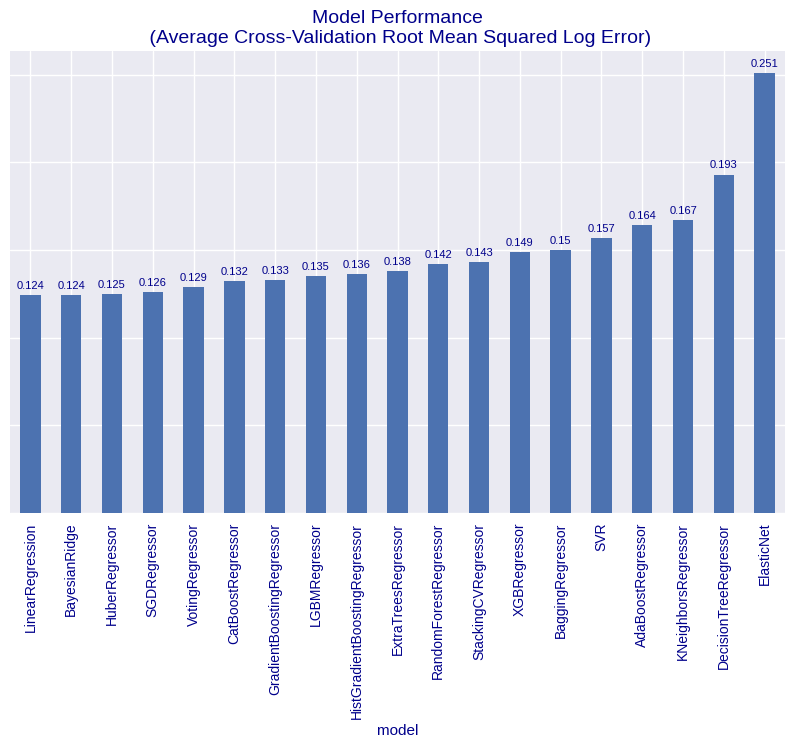

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))

df_rmsle_cv[:-1].plot.bar(ax = ax)
ax.set_xticklabels(df_rmsle_cv[:-1].index, fontsize = 10, color = 'darkblue')
ax.set_yticklabels('')
ax.xaxis.label.set_color('darkblue')
ax.bar_label(ax.containers[0], fontsize = 8, color = 'darkblue', padding = 3)
ax.legend('')
ax.set_title('Model Performance\n (Average Cross-Validation Root Mean Squared Log Error)', color = 'darkblue', fontsize = 14)
plt.show()

In [ ]:
df_rmsle_pred = pd.DataFrame(zip(model_names, np.round(rmsle_pred_list, 3)))
df_rmsle_pred.rename(columns = {0: 'model', 1: 'rmsle_pred'}, inplace = True)
df_rmsle_pred.set_index('model', drop = True, inplace = True)
df_rmsle_pred = df_rmsle_pred.sort_values(by = 'rmsle_pred')

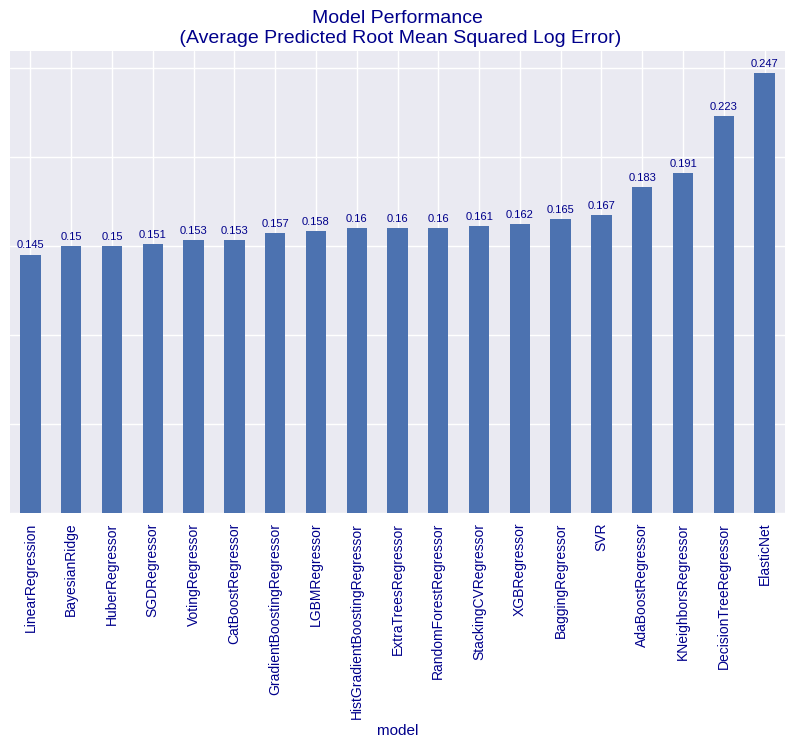

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))
df_rmsle_pred[:-1].plot.bar(ax = ax)
ax.set_xticklabels(df_rmsle_cv.index[:-1], fontsize = 10, color = 'darkblue')
ax.set_yticklabels('')
ax.xaxis.label.set_color('darkblue')
ax.bar_label(ax.containers[0], fontsize = 8, color = 'darkblue', padding = 3)
ax.legend('')
ax.set_title('Model Performance\n (Average Predicted Root Mean Squared Log Error)', color = 'darkblue', fontsize = 14)
plt.show()

# Fine tuning the CatBoost Model

# Conducting a Grid Search Cross Validation

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

model = CatBoostRegressor(eval_metric = 'MSLE', verbose = False)

target_transf = TransformedTargetRegressor(regressor = model,
                                           func = np.log, inverse_func = np.exp)

pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                           ('pca', PCA(n_components = n)),
                           ('to_dense', DenseTransformer()),
                           ("regressor", target_transf)])

param_grid = {
    'regressor__regressor__depth': [5, 10, 20, 50],
    'regressor__regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__regressor__iterations': [50, 100, 200]}

search_CB = GridSearchCV(pipeline, param_grid = param_grid, cv = 5).fit(X_train, y_train)
search_CB.best_params_

{'regressor__regressor__depth': 5,
 'regressor__regressor__iterations': 200,
 'regressor__regressor__learning_rate': 0.1}

In [ ]:
# Getting predictions from test set
y_pred = search_CB.predict(X_val)
rmsle_best_estimator_CB = np.sqrt(mean_squared_log_error(y_val, y_pred))
print('RMSLE of optimized CatBoost model:', f'{rmsle_best_estimator_CB:.3f}')

RMSLE of optimized CatBoost model: 0.124


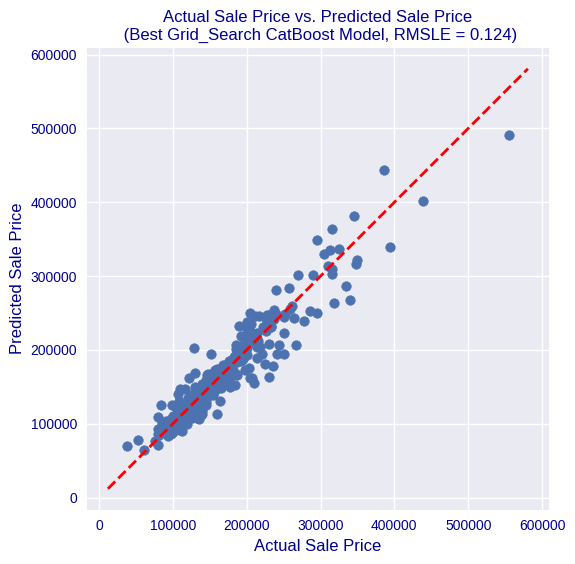

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))

df_y_val = pd.DataFrame(y_val).astype(int).reset_index(drop = True)
df_y_val.rename(columns = {0: 'Actual_Sale_Price'}, inplace = True)
checking_pred = pd.concat([pd.Series(y_pred.flatten()), df_y_val], axis = 1, ignore_index = True)
checking_pred.rename(columns = {0: 'Predicted_Sale_Price', 1: 'Actual_Sale_Price'}, inplace = True)

plt.scatter(checking_pred['Actual_Sale_Price'], checking_pred['Predicted_Sale_Price'])
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=2)
plt.axis('square')
plt.xlabel('Actual Sale Price', color = 'darkblue', fontsize = 12)
plt.ylabel('Predicted Sale Price', color = 'darkblue', fontsize = 12)
ax.xaxis.set_tick_params(labelsize=10, labelcolor='darkblue')
ax.yaxis.set_tick_params(labelsize=10, labelcolor='darkblue')
plt.title('Actual Sale Price vs. Predicted Sale Price\n (Best Grid_Search CatBoost Model, RMSLE = ' + '{:.3f})'.format(rmsle_best_estimator_CB), color='darkblue', fontsize=12)
plt.savefig('best_grid_search_CB.png')
plt.show()

# Getting feature importance from best grid_search CatBoost model

https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn

In [ ]:
pca_pipeline = Pipeline(steps=[("preprocessor", preprocessor)])
X_preproc = pca_pipeline.fit_transform(X_train)
n, _ = pca_dim_reduction(X_train, 0.9)
pca = PCA(n_components = n, svd_solver='full')
X_pca = pca.fit_transform(X_preproc)
pca.components_.shape

(48, 260)

In [ ]:
df_pca = pd.DataFrame(pca.components_, columns = pca_pipeline.named_steps['preprocessor'].get_feature_names_out(),
                      index=[f"pca{i}" for i in range(pca.components_.shape[0])])
df_pca

,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__SaleType_ConLw,cat__SaleType_New,cat__SaleType_Oth,cat__SaleType_WD,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
pca0,-0.009892,0.123749,0.071936,0.289759,-0.086988,0.253483,0.223690,0.161816,0.111312,-0.018274,...,-0.000645,0.037769,-0.000751,-0.032076,-0.010625,-0.001016,-0.000337,-0.001913,-0.023740,0.037631
pca1,0.152381,0.019243,-0.011410,0.010881,0.044872,-0.168225,-0.057466,-0.009171,-0.269064,-0.059439,...,-0.000769,-0.010359,-0.000617,0.012091,0.002120,0.000387,0.001984,0.002148,0.004974,-0.011613
pca2,-0.219302,0.252536,0.248159,-0.034569,0.090204,-0.231574,-0.211725,0.057878,0.211003,0.147114,...,-0.001271,-0.027325,-0.000148,0.021171,0.005572,-0.000602,0.003051,0.003052,0.016069,-0.027142
pca3,-0.293983,0.150885,-0.037422,-0.008851,-0.109981,-0.028864,-0.015241,-0.078986,-0.326661,-0.091206,...,-0.001380,0.040930,0.000678,-0.043673,0.001733,-0.000070,-0.001285,0.004547,-0.047024,0.042099
pca4,0.375689,-0.176535,-0.074802,-0.059969,-0.334517,-0.001281,-0.110416,0.057614,0.151630,-0.047212,...,0.000251,0.001958,0.003078,-0.015003,0.010940,0.001036,0.009139,0.006361,-0.028925,0.001450
pca5,-0.195363,0.253850,0.168117,-0.188272,-0.178789,0.180302,-0.044473,-0.034630,-0.056267,0.075175,...,0.001144,-0.031674,0.001987,0.031527,-0.015927,0.000791,0.002457,-0.000316,0.045210,-0.032215
pca6,0.020040,-0.059450,-0.067355,-0.004481,-0.228966,0.068141,-0.260719,0.401413,0.011933,-0.195648,...,-0.001463,0.012200,-0.000450,-0.016894,-0.006689,-0.000137,-0.003273,0.005631,-0.007270,0.011738
pca7,0.161630,-0.163239,0.079074,-0.029353,0.084802,0.114425,0.074194,-0.090529,-0.138860,0.344483,...,0.000757,0.006390,0.002492,-0.006221,-0.002556,0.004670,0.000955,0.006242,-0.015014,0.005702
pca8,0.098331,-0.197412,-0.111075,0.083160,0.433093,-0.090960,0.194650,0.182285,-0.015518,-0.051259,...,0.000984,-0.022957,-0.002694,0.024605,-0.023673,-0.001690,-0.002684,-0.000951,0.050875,-0.021877
pca9,0.015195,-0.023963,-0.080988,0.002078,-0.255289,0.062566,-0.099306,-0.073772,-0.182401,0.469943,...,0.002634,-0.004888,-0.000538,-0.009907,0.008886,-0.001770,-0.000921,-0.004602,0.002416,-0.004009


In [ ]:
df_feature_relevance = pd.DataFrame(np.round(search_CB.best_estimator_.named_steps['regressor'].regressor_.feature_importances_, 2),
                                    index = search_CB.best_estimator_.named_steps['pca'].get_feature_names_out())
df_feature_relevance.rename(columns = {0: 'feature_relevance'}, inplace = True)
df_feature_relevance = df_feature_relevance.sort_values(by = 'feature_relevance', ascending = False)
df_feature_relevance[:10]

,feature_relevance
pca0,69.52
pca2,6.42
pca3,2.13
pca4,1.83
pca5,1.59
pca19,1.09
pca26,1.01
pca1,0.99
pca6,0.91
pca8,0.91


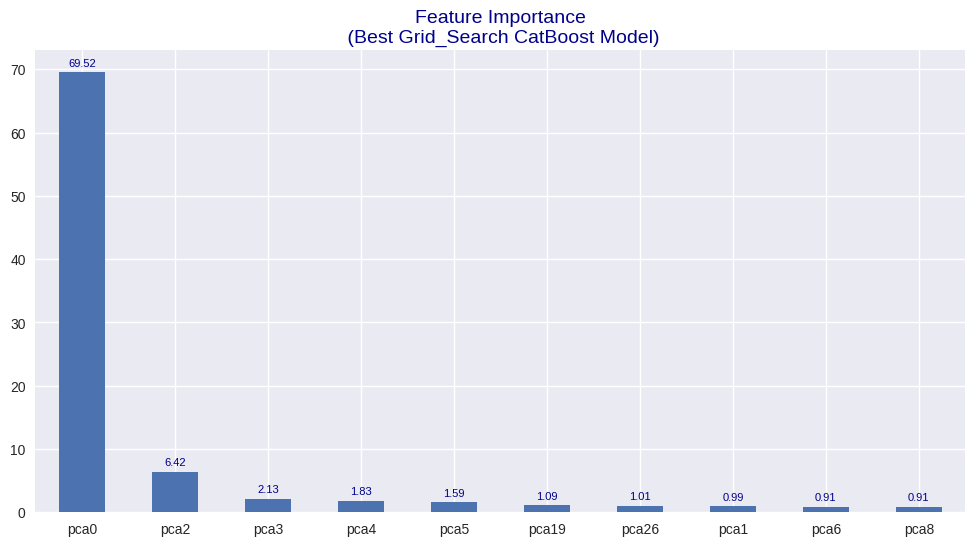

In [49]:
# Plotting feature importance
fig, ax = plt.subplots(figsize = (12, 6))

df_feature_relevance[:10].plot.bar(ax = ax)
ax.xaxis.label.set_color('darkblue')
ax.bar_label(ax.containers[0], fontsize = 8, color = 'darkblue', padding = 3)
ax.xaxis.set_tick_params(labelsize = 10, color = 'darkblue', rotation = 0)
ax.yaxis.set_tick_params(labelsize = 10, color = 'darkblue')
ax.set_title('Feature Importance\n (Best Grid_Search CatBoost Model)', color = 'darkblue', fontsize = 14)
plt.legend('')
plt.show()

# Recovering relevant features on which the first important principal component (pca0) loads

In [ ]:
# Recovering the original features that most contribute to the first principal component, pca0
df_pc0 = pd.DataFrame(np.round(df_pca.iloc[0], 2)).sort_values(by = 'pca0', ascending = False)
df_pc0

,pca0
num__OverallQual,0.29
num__GarageCars,0.27
num__GarageArea,0.25
num__YearBuilt,0.25
num__GrLivArea,0.25
...,...
num__OverallCond,-0.09
cat__KitchenQual_TA,-0.11
cat__GarageFinish_Unf,-0.11
cat__BsmtQual_TA,-0.12


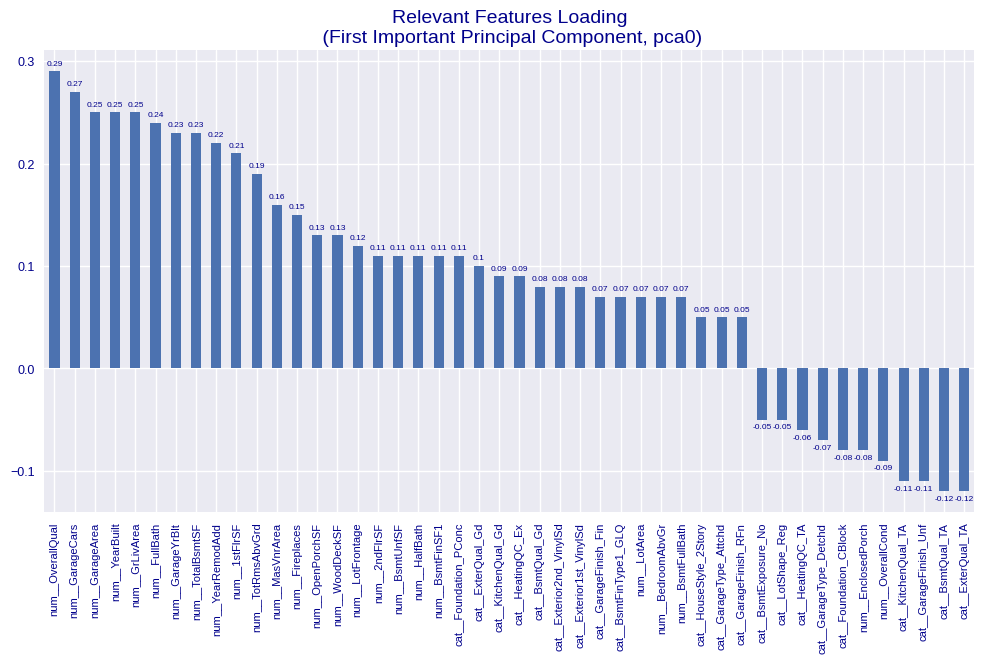

In [50]:
fig, ax = plt.subplots(figsize = (12, 6))
df_pc0.loc[(df_pc0['pca0'] >= 0.05) | (df_pc0['pca0'] <= -0.05)].plot.bar(ax = ax)
ax.bar_label(ax.containers[0], fontsize = 6, color = 'darkblue', padding = 3)
plt.xticks(fontsize = 8, color = 'darkblue')
plt.yticks(fontsize = 9, color = 'darkblue')
plt.title('Relevant Features Loading\n (First Important Principal Component, pca0)', color = 'darkblue', fontsize = 14)
plt.legend('')
plt.show()

# Recovering relevant features on which the second important principal component (pca2) loads

In [ ]:
# Recovering the original features that most contribute to the second principal component, pca2
df_pc2 = pd.DataFrame(np.round(df_pca.iloc[2], 2)).sort_values(by = 'pca2', ascending = False)
df_pc2

,pca2
num__1stFlrSF,0.30
num__LotArea,0.25
num__LotFrontage,0.25
num__Fireplaces,0.22
num__TotalBsmtSF,0.22
...,...
cat__Foundation_PConc,-0.12
num__YearRemodAdd,-0.21
num__MSSubClass,-0.22
num__YearBuilt,-0.23


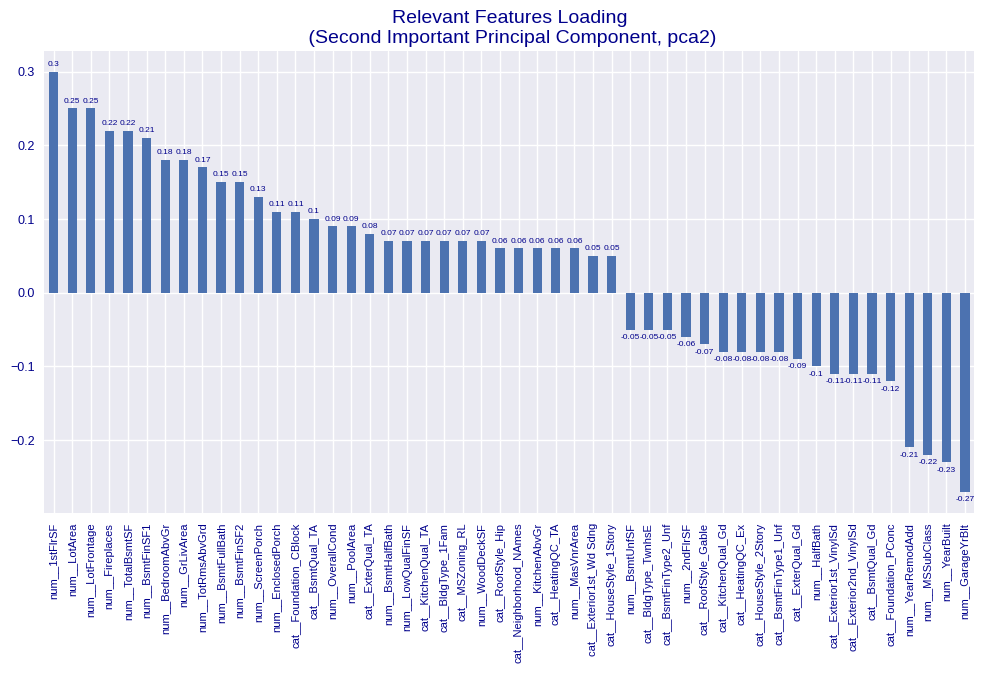

In [ ]:
fig, ax = plt.subplots(figsize = (12, 6))

df_pc2.loc[(df_pc2['pca2'] >= 0.05) | (df_pc2['pca2'] <= -0.05)].plot.bar(ax = ax)
ax.bar_label(ax.containers[0], fontsize = 6, color = 'darkblue', padding = 3)
plt.xticks(fontsize = 8, color = 'darkblue')
plt.yticks(fontsize = 9, color = 'darkblue')
plt.title('Relevant Features Loading\n (Second Important Principal Component, pca2)', color = 'darkblue', fontsize = 14)
plt.legend('')
plt.show()

# Recovering relevant features on which the third important principal component (pca3) loads

In [52]:
# Recovering the original features that most contribute to the third principal component, pca4
df_pc3 = pd.DataFrame(np.round(df_pca.iloc[3], 2)).sort_values(by = 'pca3', ascending = False)
df_pc3

,pca3
num__BsmtUnfSF,0.52
num__1stFlrSF,0.18
num__TotalBsmtSF,0.17
cat__BsmtFinType1_Unf,0.16
num__LotFrontage,0.15
...,...
num__2ndFlrSF,-0.24
num__HalfBath,-0.28
num__MSSubClass,-0.29
num__BsmtFullBath,-0.32


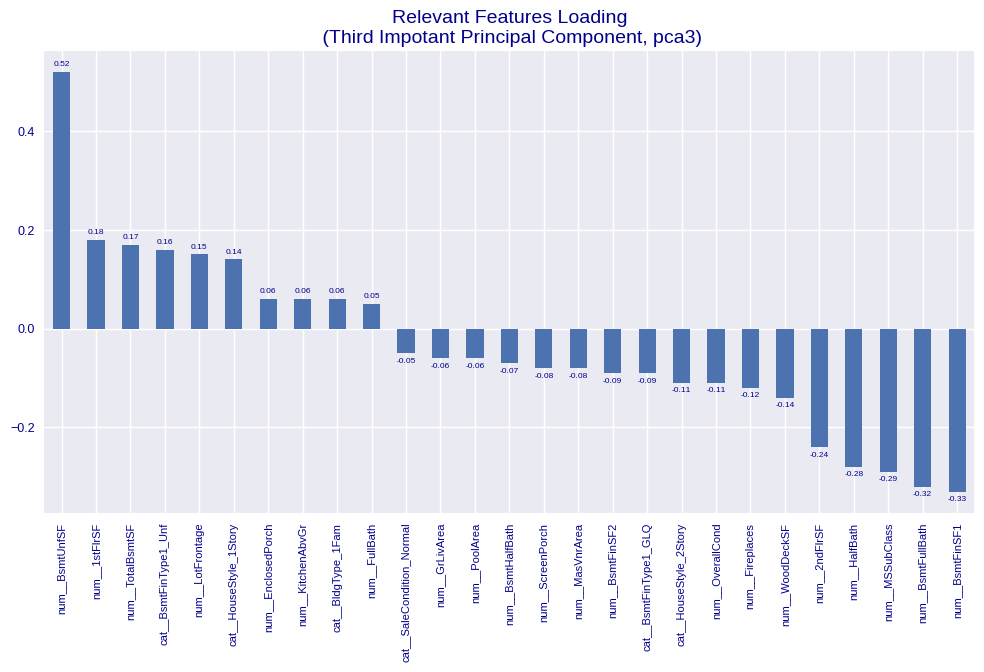

In [54]:
fig, ax = plt.subplots(figsize = (12, 6))

df_pc3.loc[(df_pc3['pca3'] >= 0.05) | (df_pc3['pca3'] <= -0.05)].plot.bar(ax = ax)
ax.bar_label(ax.containers[0], fontsize = 6, color = 'darkblue', padding = 3)
plt.xticks(fontsize = 8, color = 'darkblue')
plt.yticks(fontsize = 9, color = 'darkblue')
plt.title('Relevant Features Loading\n (Third Impotant Principal Component, pca3)', color = 'darkblue', fontsize = 14)
plt.legend('')
plt.show()

# Fine tuning the GradientBoosting model

In [42]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import GridSearchCV

model = GradientBoostingRegressor()

target_transf = TransformedTargetRegressor(regressor = model,
                                           func = np.log, inverse_func = np.exp)

param_grid = {
    'regressor__regressor__max_depth': [5, 10, 20, 50],
    'regressor__regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__regressor__n_estimators': [50, 100, 200]}

search_GB = GridSearchCV(pipeline, param_grid = param_grid, cv = 5).fit(X_train, y_train)
search_GB.best_params_

{'regressor__regressor__learning_rate': 0.1,
 'regressor__regressor__max_depth': 5,
 'regressor__regressor__n_estimators': 200}

In [43]:
# Getting predictions from test set
y_pred_GB = search_GB.predict(X_val)
rmsle_best_estimator_GB = np.sqrt(mean_squared_log_error(y_val, y_pred_GB))
print('RMSLE of optimized CatBoost model:', f'{rmsle_best_estimator_GB:.3f}')

RMSLE of optimized CatBoost model: 0.124


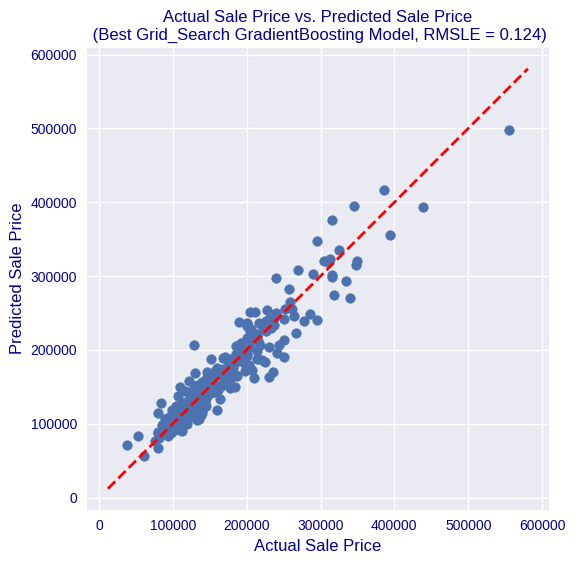

In [44]:
fig, ax = plt.subplots(figsize = (8, 6))

df_y_test = pd.DataFrame(y_val).astype(int).reset_index(drop = True)
df_y_test.rename(columns = {0: 'Actual_Sale_Price'}, inplace = True)
checking_pred_GB = pd.concat([pd.Series(y_pred_GB.flatten()), df_y_test], axis = 1, ignore_index = True)
checking_pred_GB.rename(columns = {0: 'Predicted_Sale_Price', 1: 'Actual_Sale_Price'}, inplace = True)

plt.scatter(checking_pred_GB['Actual_Sale_Price'], checking_pred_GB['Predicted_Sale_Price'])
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=2)
plt.axis('square')
plt.xlabel('Actual Sale Price', color = 'darkblue', fontsize = 12)
plt.ylabel('Predicted Sale Price', color = 'darkblue', fontsize = 12)
ax.xaxis.set_tick_params(labelsize = 10, labelcolor = 'darkblue')
ax.yaxis.set_tick_params(labelsize = 10, labelcolor = 'darkblue')
plt.title('Actual Sale Price vs. Predicted Sale Price\n (Best Grid_Search GradientBoosting Model, RMSLE = ' + '{:.3f})'.format(rmsle_best_estimator_GB), color='darkblue', fontsize=12)
plt.savefig('best_grid_search_GB.png')
plt.show()

# Comparing the two best models

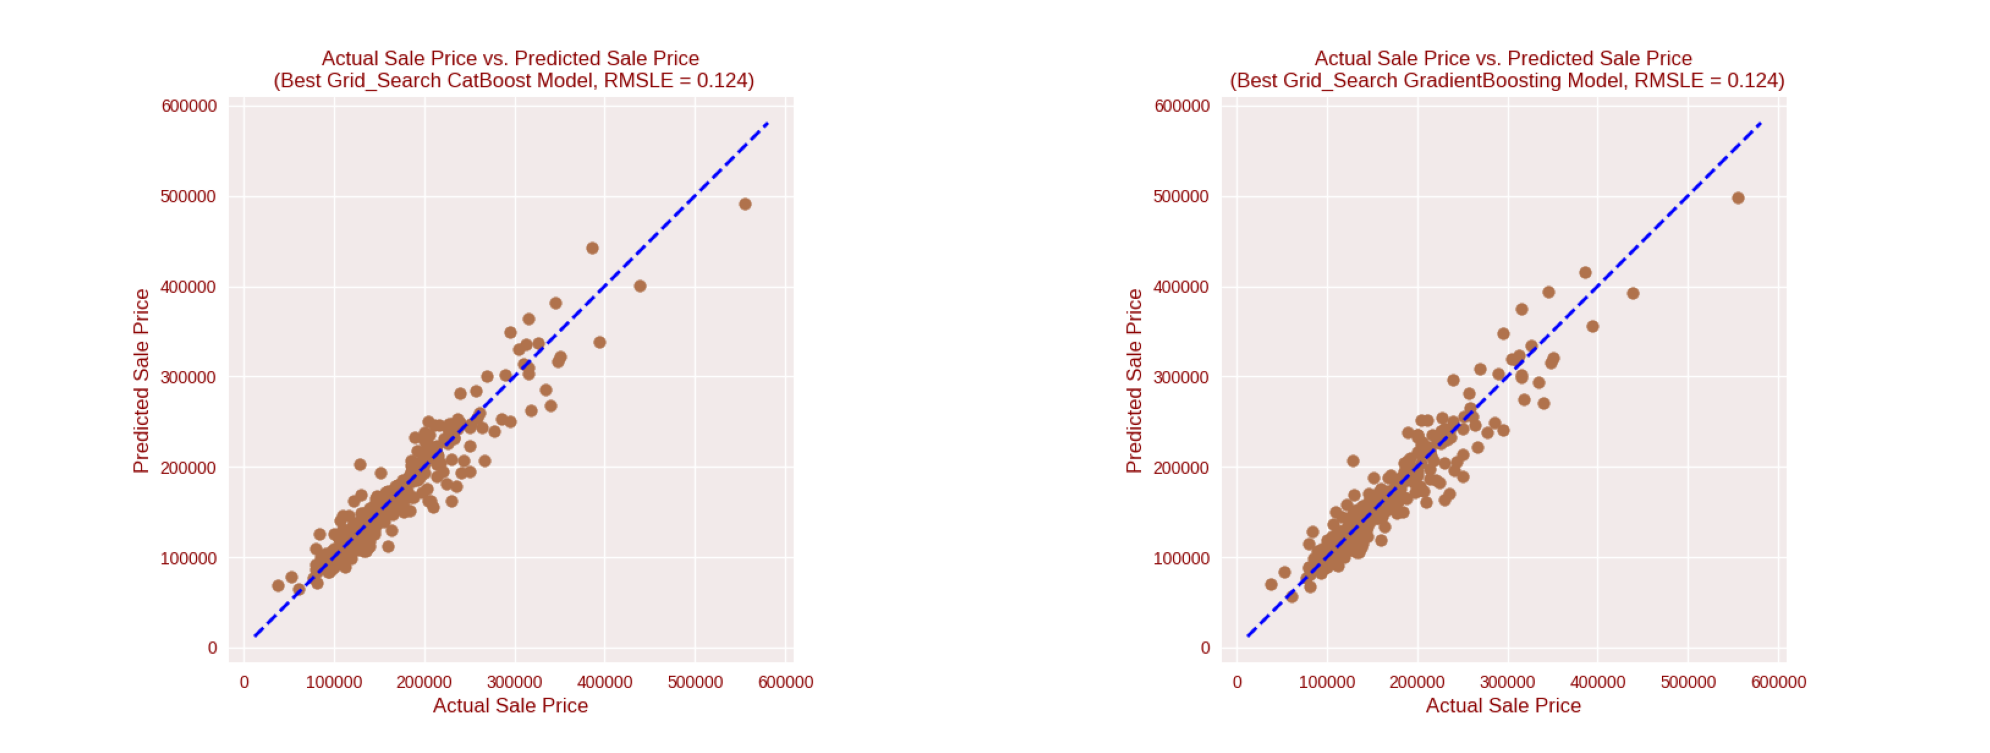

In [45]:
import cv2

fig = plt.figure(figsize=(20, 10))

# setting values to rows and column variables
rows = 1
columns = 2

# reading images
fig1 = cv2.imread('best_grid_search_CB.png')
fig2 = cv2.imread('best_grid_search_GB.png')

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(fig1)
plt.axis('off')

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
# showing image
plt.imshow(fig2)
plt.axis('off')
plt.tight_layout()
plt.show()

# Generating the submission file (from Grid_Search)


In [46]:
# Creating the submission file
y_pred_submission = np.trunc(search_CB.predict(df_test_filtered)).astype(int)
print(y_pred_submission.shape)
df_submission = pd.DataFrame(pd.Series(y_pred_submission.flatten())
                             ).rename(columns = {0: 'SalePrice'})
df_submission = pd.concat([df_test['Id'], df_submission], axis = 1)
df_submission.head(10)

(1459, 1)


,Id,SalePrice
0,1461,118994
1,1462,150659
2,1463,183665
3,1464,194215
4,1465,183912
5,1466,183189
6,1467,171359
7,1468,163810
8,1469,179439
9,1470,130643


In [47]:
df_submission.to_csv('submission.csv', index = False)